In [1]:
# Pandas tarih ve zaman bilgisini datetime nesnelerinde tutar
# read_csv() fonksiyonu ile stringleri datetime nesneleri olarak okuyabiliriz, bunun için parse_dates=True
# argümanını kullanırız. Parse işlemi için tarih ve zaman bilgisini tutan stringler ISO 8601 formatında olmalıdır
# ISO 8601 formatı şu şekildedir: yyyy-mm-dd hh:mm:ss
# Parse edilen sütun artık datetime nesneleri içerir ve bu sütunu indeks olarak kullanabiliriz
# Böylece loc methoduna tarihleri vererek satırları seçebiliriz
# Tarih ile seçim yaparken tarih formatındaki herhangi bir parçayı seçebiliriz(belirli bir gün, ve ya ay, yıl...)
# Datetime stringleri kullanarak seçeceğimiz satır aralıklarını belirleyebiliriz: 2015-2-10:2015-2-20 gibi...
# pd.to_datetime() fonksiyonunu kullanarak ISO 8601 formatındaki stringleri datetime nesnelerine çevirebiliriz
# dataframe üzerinde reindex metodunu çağırarak ve yeni bir indeks listesi vererek indeksi değiştirebiliriz
# reindex çağırıldığı zaman önceki indeks ile örtüşen satırların değerleri tekrarlanır, örtüşme olmayan
# satırların değerleri NaN olur

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

values = [24, 22, 26, 37, 20]
dates = ['23091994 1105', '14051996 0745', '13011992 0102', '05031982 1416', '27101999 0732']
datetime = pd.to_datetime(dates, format='%d%m%Y %H%M')
datetime

DatetimeIndex(['1994-09-23 11:05:00', '1996-05-14 07:45:00',
               '1992-01-13 01:02:00', '1982-03-05 14:16:00',
               '1999-10-27 07:32:00'],
              dtype='datetime64[ns]', freq=None)

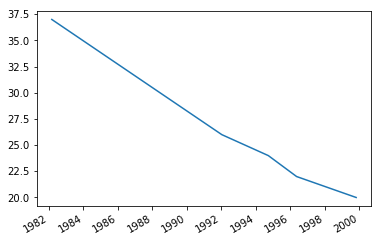

In [17]:
# Doğum tarihi olarak verdiğimiz için tarihler sıralandığında değerlerde sıralanmış oluyor ve azalan bir grafik oldu
pd.Series(values, index=datetime).plot()

In [18]:
# Farklı zaman aralıkları arasında istatistik uygulamaya resampling deniyor
# Eğer dataframe i daha düşük frekansta eşit aralıklarla örneklersek downsampling olur, gün yerine hafta gibi
# Upsampling ise tam tersi işlemdir, gün yerine saat gibi
# resampling işlemi için resample metodunu kullanabiliriz: df.resample('D').mean() çağrısı ile gün bazlı
# yeniden örnekleme yapılarak değerlerin ortalaması hesaplanır ve sonuçlar bir Series te tutulur
# Örneğin sales.resample('D').sum().max() günlük bazda yapılan en yüksek toplam satış sayısını verir
# Yeniden örnekleme yapılırken kayıp değerler default olarak NaN ile değiştirilir
# resample metoduna verilen frekansların tamsayı katları alınarak yeni bir aralık oluşturulabilir
# Örneğin iki haftada bir örnekleme şu şekilde yapılır: df.resample('2W').mean()
# Upsampling yaparken interpolasyon gerekir: sales.resample('4H').ffill()

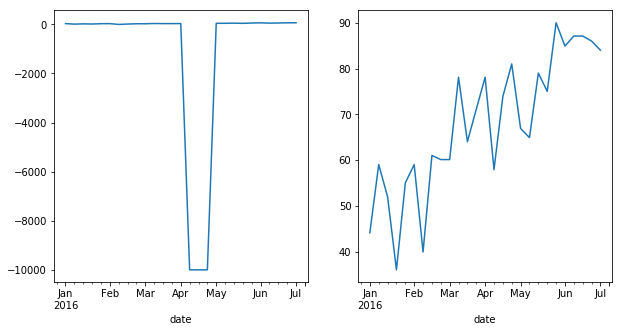

In [35]:
temperatures = pd.read_csv('New_York_Hourly.csv', parse_dates=True, index_col=0)['TemperatureF']
weekly_min = temperatures.resample('W').min()
weekly_max = temperatures.resample('W').max()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
weekly_min.plot(ax=axes[0])
weekly_max.plot(ax=axes[1])
plt.show()


In [36]:
# Resampling yaparken rolling tekniğinden faydalanmak yararlı olabilir
# Rolling tekniği ile zaman serisindeki küçük aralıklı dalgalanmalar yumuşatılır ve uzun vadeli trendler
# belirgin hale getirilmeye çalışılır. Örneğin mean için rolling means(moving averages) kullanılabilir
# df.rolling(window=24).mean() çağrısı ile 24 değer genişlikte bir pencere kullanılarak ortalama üzerinden 
# yumuşatma yapılır. Default olarak güncellenecek değer pencerenin en sağındaki değermiş gibi işlem yapılır
# Dolayısıyla ilk 23 değer NaN olur

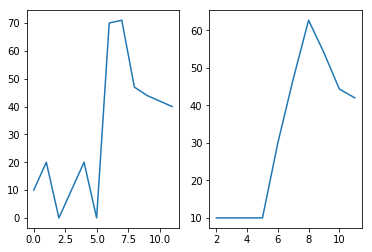

In [39]:
values = [10, 20, 0, 10, 20, 0, 70, 71, 47, 44, 42, 40]
df = pd.Series(values)
smoothed = df.rolling(window=3).mean()

fig, axes = plt.subplots(1, 2)

df.plot(ax=axes[0])
smoothed.plot(ax=axes[1])
plt.show()